In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Internship\Black_Friday Project/blackFriday_train.csv')
df 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df.shape

(550068, 12)

In [5]:
df.size

6600816

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
None


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [10]:
df1=lb.fit_transform(df['Product_ID'])
pd.Series(df1)

0          672
1         2376
2          852
3          828
4         2734
          ... 
550063    3567
550064    3568
550065    3568
550066    3568
550067    3566
Length: 550068, dtype: int32

In [11]:
df['Product_ID']=df1

In [12]:
df2=lb.fit_transform(df['Gender'])
pd.Series(df2)
df['Gender']=df2

In [13]:
df3=lb.fit_transform(df['Age'])
pd.Series(df3)
df['Age']=df3

In [14]:
df4=lb.fit_transform(df['City_Category'])
pd.Series(df4)
df['City_Category']=df4

In [15]:
df5=lb.fit_transform(df['Stay_In_Current_City_Years'])
pd.Series(df5)
df['Stay_In_Current_City_Years']=df5

In [16]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,852,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,2734,1,6,16,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,3567,1,5,13,1,1,1,20,NaN,NaN,368
550064,1006035,3568,0,2,1,2,3,0,20,NaN,NaN,371
550065,1006036,3568,0,2,15,1,4,1,20,NaN,NaN,137
550066,1006038,3568,0,6,1,2,2,0,20,NaN,NaN,365


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int32  
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(5), int64(5)
memory usage: 39.9 MB
None


In [18]:
df6=lb.fit_transform(df['Product_Category_2'])
pd.Series(df6)
df['Product_Category_2']=df6

In [19]:
df7=lb.fit_transform(df['Product_Category_3'])
pd.Series(df7)
df['Product_Category_3']=df7

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     550068 non-null  int64
 1   Product_ID                  550068 non-null  int32
 2   Gender                      550068 non-null  int32
 3   Age                         550068 non-null  int32
 4   Occupation                  550068 non-null  int64
 5   City_Category               550068 non-null  int32
 6   Stay_In_Current_City_Years  550068 non-null  int32
 7   Marital_Status              550068 non-null  int64
 8   Product_Category_1          550068 non-null  int64
 9   Product_Category_2          550068 non-null  int64
 10  Product_Category_3          550068 non-null  int64
 11  Purchase                    550068 non-null  int64
dtypes: int32(5), int64(7)
memory usage: 39.9 MB
None


In [21]:
df.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,1707.473323,0.753105,2.496430,8.076707,1.042640,1.858418,0.409653,5.404270,10.733098,13.123443,9263.968713
std,1.727592e+03,1012.201109,0.431205,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,5.985166,3.553173,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,930.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,6.000000,12.000000,5823.000000
50%,1.003077e+06,1666.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,12.000000,15.000000,8047.000000
75%,1.004478e+06,2550.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,17.000000,15.000000,12054.000000
max,1.006040e+06,3630.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,17.000000,15.000000,23961.000000


In [22]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

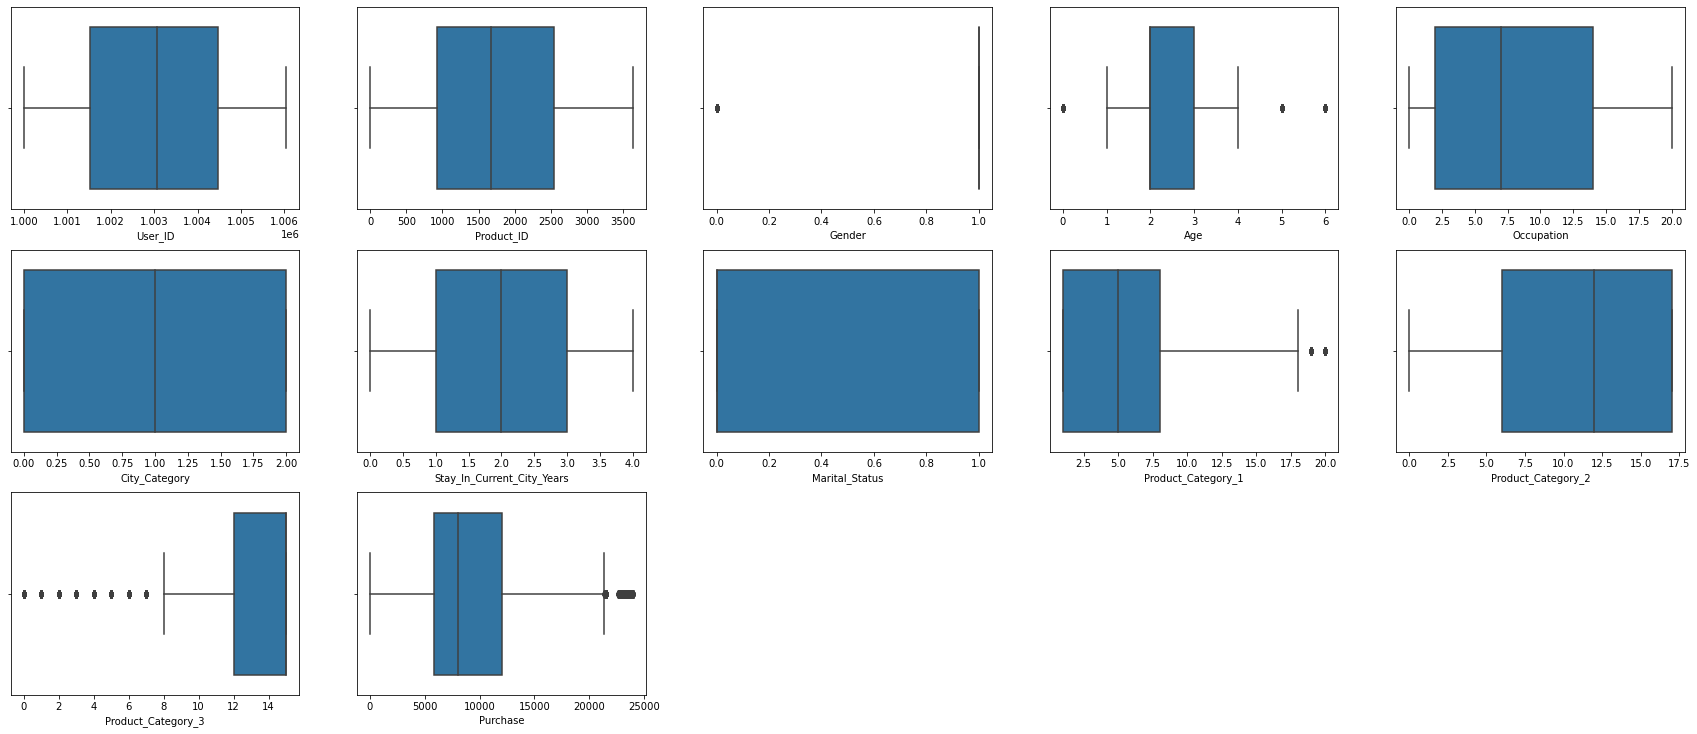

In [30]:
plt.figure(figsize=(30,35))
plotnumber=1
for column in df:
    if plotnumber<=35:
        ax=plt.subplot(8,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
        plotnumber+=1
plt.show() 

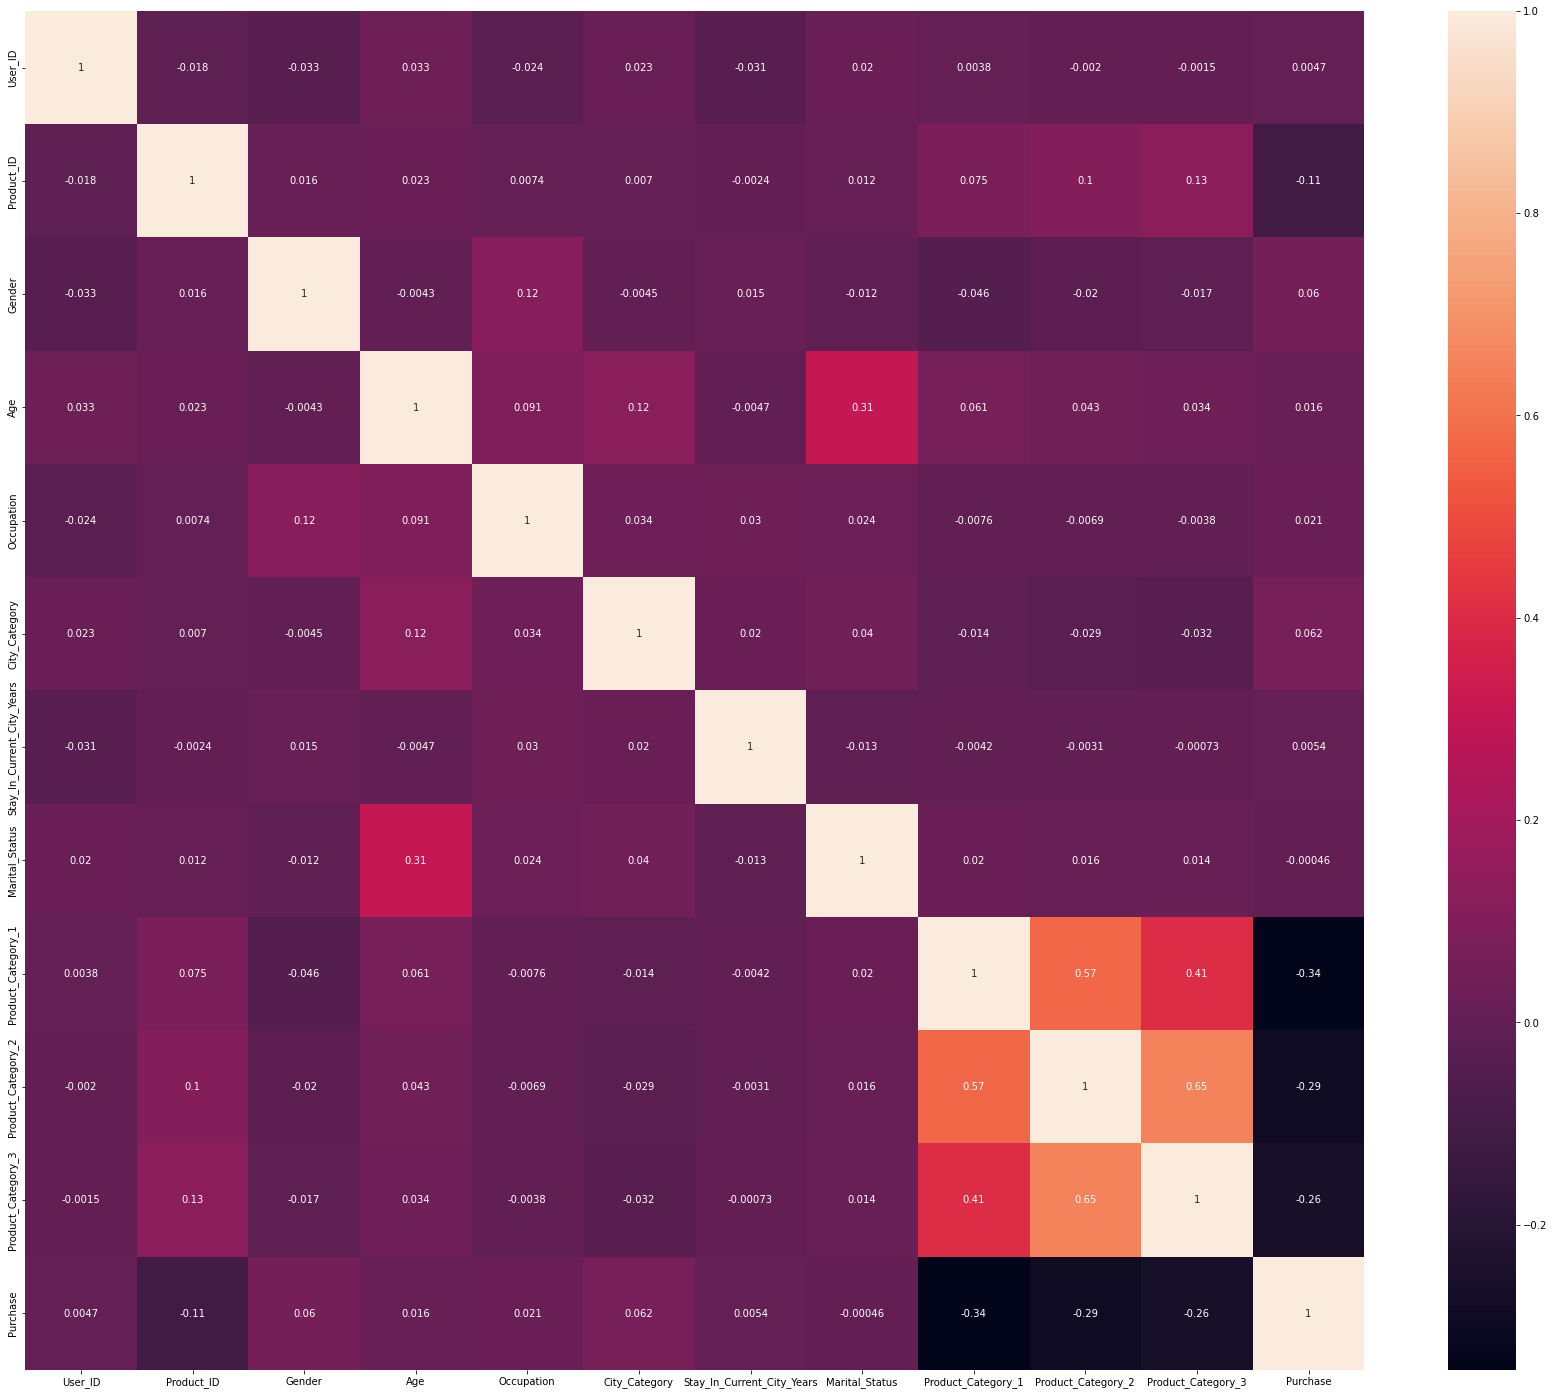

In [31]:
cor=df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(cor,annot=True)
plt.show()

In [26]:
X = df.drop(['Purchase'],axis=1)
y = df['Purchase']

In [27]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, random_state=48)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
lr=LogisticRegression() 
knn=KNeighborsClassifier() 
dt=DecisionTreeClassifier() 
rf=RandomForestClassifier() 
adb=AdaBoostClassifier()    
svm=SVC()                
   
print("Model is created")

Model is created


In [35]:

lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
print("Model is trained")

MemoryError: Unable to allocate 49.9 GiB for an array with shape (385047, 17377) and data type int64